(1000, 1000)


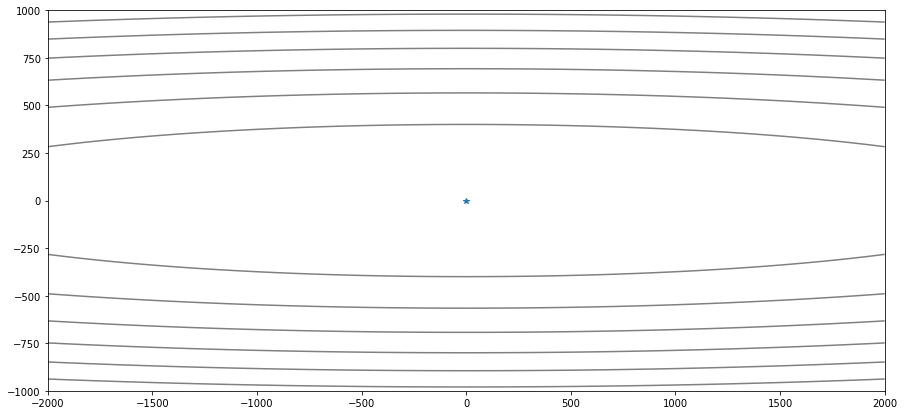

In [37]:
import numpy as np
import matplotlib.pyplot as plt

w1 = np.linspace(-2000, 2000, 1000) # -2000到2000间等距的1000个数
w2 = np.linspace(-1000, 1000, 1000)
W1, W2 = np.meshgrid(w1, w2) # w1和w2中的数作为x, y坐标两两组合
print(W1.shape) # (1000, 1000)

# 比较传统梯度下降和momentum哪个先到达极小值
J = W1 * W1 + 50 * W2 * W2

# W1 W2 J 构成三维坐标空间中的1000个点，可以用于绘制等高线

# dw1 = 2 * w1, dw2 = 100 * w2
def cal_grad(w):
    return np.array([2 * w[0], 100 * w[1]])

def contour(W1, W2, J, arr=None):
    plt.figure(figsize=(15, 7)) # 单位是英寸
    xx = W1.flatten() # 按行降到一维
    yy = W2.flatten()
    zz = J.flatten()
    plt.contour(W1, W2, J, colors='gray') # 在W1(x) W2(y) 处的高为 J，画出等高线
    plt.plot(0, 0, marker='*') # 中心点
    # 画轨迹，arr是一个(iters, 2)的列表
    if arr is not None:
        plt.plot(arr[0], arr[1])

contour(W1, W2, J)
    
    



iters = 50 grad = [ 561.83630289 -501.06147849] param = [270.24326169   4.50955331]


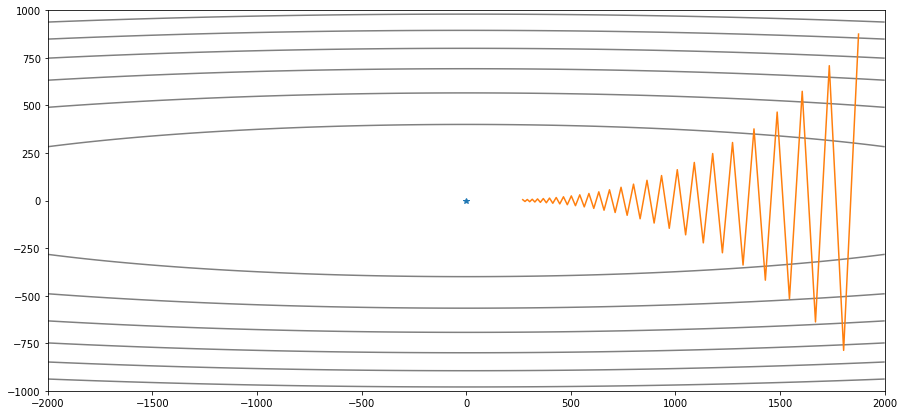

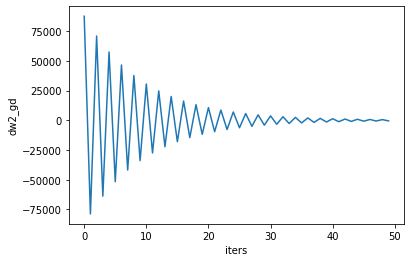

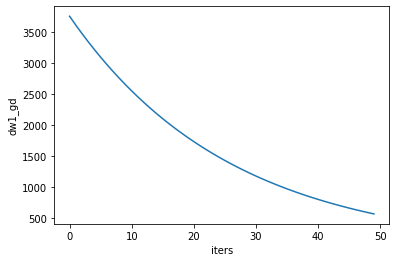

In [51]:
iters = 50
lr = 0.019
# lr = 0.02 # 震荡变大

# 普通梯度下降
def gd(iters, param_src, lr, cal_grad):
    param = np.array(param_src, dtype='float64')
    iter_position = [[param[0]], [param[1]]] # 保存每次迭代的位置
    dw1 = []
    dw2 = []
    w1 = []
    w2 = []
    for i in range(iters):
        grad = cal_grad(param)
        param = param - lr * grad
        iter_position[0].append(param[0])
        iter_position[1].append(param[1])
        dw1.append(grad[0])
        dw2.append(grad[1])
        w1.append(param[0])
        w2.append(param[1])
        if i == iters - 1:
            print('iters =', iters, 'grad =', grad, 'param =', param)
        if abs(sum(grad)) < 1e-8:
            break
    return param, iter_position, dw1, dw2, w1, w2

param_gd, iter_position_gd, dw1_gd, dw2_gd, w1_gd, w2_gd = gd(iters, [1875, 875], lr, cal_grad)
contour(W1, W2, J, iter_position_gd)

plt.figure()
plt.plot(dw2_gd)
plt.ylabel('dw2_gd')
plt.xlabel('iters')
plt.show()
    
plt.figure()
plt.plot(dw1_gd)
plt.ylabel('dw1_gd')
plt.xlabel('iters')
plt.show()    

iters = 50 grad = [ 0.05826931 -6.75124209] param = [ 0.0731458  -0.14496256]


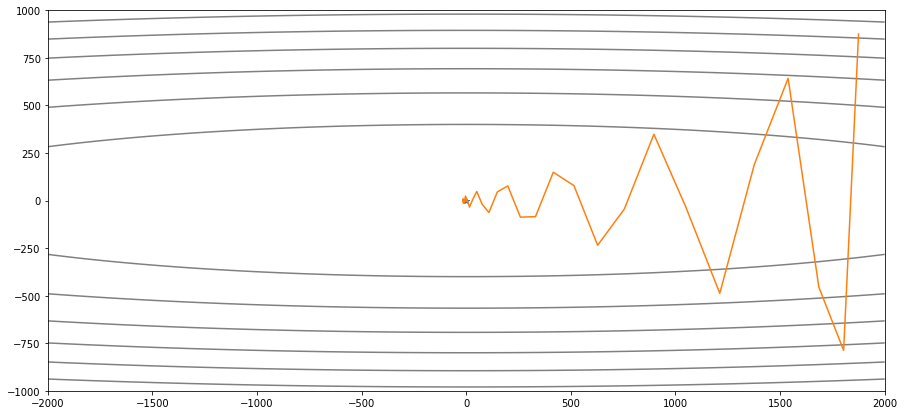

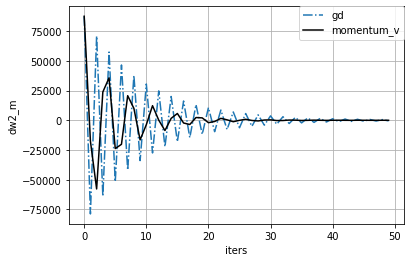

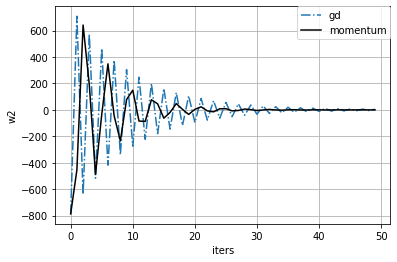

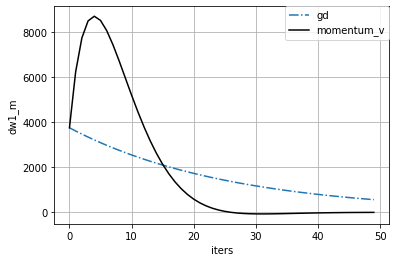

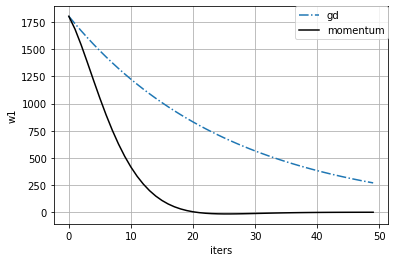

In [53]:
def gd_momentum(iters, param_src, lr, cal_grad, momentum=0.7): # momentum代表历史梯度对当前梯度的影响
    param = np.array(param_src, dtype='float64')
    V = np.zeros_like(param) # 历史梯度累加器
    iter_position = [[param[0]], [param[1]]] # 保存每次迭代的位置
    dw1 = []
    dw2 = []
    v1 = []
    v2 = []
    w1 = []
    w2 = []
    for i in range(iters):
        grad = cal_grad(param)
        
        # 三种momentum公式
        V = momentum * V + grad  # tensorflow实现的版本，起到同向加强，反向减弱的效果
        # 减弱了当前梯度的影响
#         V = momentum * V + (1 - momentum) * grad # 无法加快同向速度
#         V = momentum * V + lr * grad # 学习率不能太小
        
        param = param - lr * V
        iter_position[0].append(param[0])
        iter_position[1].append(param[1])
        dw1.append(grad[0])
        dw2.append(grad[1])
        v1.append(V[0])
        v2.append(V[1])
        w1.append(param[0])
        w2.append(param[1])
        if i == iters - 1:
            print('iters =', iters, 'grad =', grad, 'param =', param)
        if abs(sum(grad)) < 1e-8:
            break
    return param, iter_position, dw1, dw2, v1, v2, w1, w2

param_m, iter_position_m, dw1_m, dw2_m, v1_m, v2_m, w1_m, w2_m = gd_momentum(iters, [1875, 875], lr, cal_grad)
contour(W1, W2, J, iter_position_m)

plt.figure()
plt.plot(dw2_gd, '-.', label='gd')
plt.plot(v2_m, 'black', label='momentum_v')
plt.ylabel('dw2_m')
plt.xlabel('iters')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()
    
plt.figure()
plt.plot(w2_gd, '-.', label='gd')
plt.plot(w2_m, 'black', label='momentum')
plt.ylabel('w2')
plt.xlabel('iters')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()

plt.figure()
plt.plot(dw1_gd, '-.', label='gd')
plt.plot(v1_m, 'black', label='momentum_v')
plt.ylabel('dw1_m')
plt.xlabel('iters')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()
    
plt.figure()
plt.plot(w1_gd, '-.', label='gd')
plt.plot(w1_m, 'black', label='momentum')
plt.ylabel('w1')
plt.xlabel('iters')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()